In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [11]:
#Import Dataset
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [12]:
#Create dummy vars
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [13]:
#Concatenate the data frames
X = pd.concat([X, geography, gender], axis=1)

In [14]:
#Drop unnecessary Columns
X = X.drop(['Geography', 'Gender'], axis=1)

In [15]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
#Making An ANN

In [76]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [77]:
#Initialse ANN
classifier = Sequential()

In [78]:
#Adressing the input layer and first hidden layer
classifier.add(Dense(units = 10, kernel_initializer= 'he_normal',activation='relu',input_dim = 11))
#Dropout
classifier.add(Dropout(0.3))

In [79]:
#Adding hidden layer 2
classifier.add(Dense(units = 20, kernel_initializer= 'he_normal',activation='relu'))
#Dropout
classifier.add(Dropout(0.4))

#Adding hidden layer 3
classifier.add(Dense(units = 15, kernel_initializer= 'he_normal',activation='relu'))
#Dropout
classifier.add(Dropout(0.2))

In [80]:
#Adding Output Layer
classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform',activation='sigmoid'))

In [81]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                120       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 15)                315       
_________________________________________________________________
dropout_5 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [83]:
#Fitting ANN to Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 995us/step - loss: 0.5993 - accuracy: 0.7486 - val_loss: 0.4941 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 0s 848us/step - loss: 0.5010 - accuracy: 0.7938 - val_loss: 0.4567 - val_accuracy: 0.7978
Epoch 3/100
536/536 [==============================] - 0s 844us/step - loss: 0.4834 - accuracy: 0.7931 - val_loss: 0.4494 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 0s 880us/step - loss: 0.4733 - accuracy: 0.8013 - val_loss: 0.4397 - val_accuracy: 0.7997
Epoch 5/100
536/536 [==============================] - 0s 847us/step - loss: 0.4587 - accuracy: 0.8033 - val_loss: 0.4316 - val_accuracy: 0.8058
Epoch 6/100
536/536 [==============================] - 0s 836us/step - loss: 0.4548 - accuracy: 0.8056 - val_loss: 0.4301 - val_accuracy: 0.8046
Epoch 7/100
536/536 [==============================] - 0s 876us/step - loss: 0.4439 - accuracy: 0.8108 - val_loss: 0.4220 - val_ac

In [84]:
# List all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


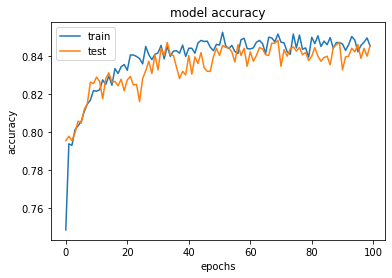

In [85]:
# Summarise history for Accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
# Making prediction to evaluate the model
#making test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [87]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [88]:
#Calculate Accuracy
score = accuracy_score(y_pred, y_test)

In [89]:
score

0.8645